# Financial Data Analysis for AI-Powered Financial Chatbot Development
#####  Mathew Rajath Thomson
\
\
This notebook documents the process of extracting, analyzing, and deriving insights from the financial data of Microsoft, Tesla, and Apple over the last three fiscal years(2023,2022,2021). The analysis focuses on identifying trends that could inform the development of an AI-powered financial chatbot. The data was manually extracted from the SEC's EDGAR database and compiled into a structured format for analysis.

## Objective

The primary objective of this analysis is to:
- Identify year-over-year growth trends in Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities.
- Use these insights to contribute to the development of a financial chatbot capable of delivering informed and data-driven financial insights.

## Methodology

#### Data Collection

Financial figures were manually extracted from the 10-K filings available on the SEC's EDGAR database for:
- **Microsoft**
- **Tesla**
- **Apple**

#### Data Preparation

The extracted data was compiled into an Excel spreadsheet and converted to a CSV format for ease of use with pandas in a Python environment.

#### Data Analysis

1. **Trend Analysis**

2. **Ratio Analysis**

#### Key Findings

- Summary of the growth trends observed.
- Insights from the analysis, highlighting areas of strength and concern for each company.

#### Conclusion

Concluded the analysis with reflections on the implications of the findings for the development of the financial chatbot and suggested next steps for further analysis or development.

## Next Steps

- Consider integrating real-time financial data feeds to enhance the chatbot's capability.
- Explore machine learning models to predict future financial trends based on historical data.

---

This analysis provides a foundational understanding of the financial health and performance trends of Microsoft, Tesla, and Apple, serving as a stepping stone toward the development of an advanced AI-powered financial chatbot.


## Loading data

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# load the csv file
df = pd.read_csv('data/10Q.csv')

## Data Exploration

In [2]:
df.head(10)

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2023,"$211,915","$72,361","$411,976","$205,753","$87,600"
1,Microsoft,2022,"$198,270","$72,738","$364,840","$198,298","$89,000"
2,Microsoft,2021,"$168,088","$61,271","$333,779","$191,791","$76,700"
3,Tesla,2023,"$96,773","$14,974","$106,618","$43,009","$13,256"
4,Tesla,2022,"$81,462","$12,587","$82,338","$36,440","$14,724"
5,Tesla,2021,"$53,823","$5,644","$62,131","$30,548","$11,497"
6,Apple,2023,"$382,285","$96,995","$352,583","$290,437","$110,543"
7,Apple,2022,"$394,328","$99,803","$352,755","$302,083","$122,151"
8,Apple,2021,"$365,817","$94,680","$351,002","$287,912","$104,038"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Company                              9 non-null      object
 1   Fiscal Year                          9 non-null      int64 
 2   Total Revenue                        9 non-null      object
 3   Net Income                           9 non-null      object
 4   Total Assets                         9 non-null      object
 5   Total Liabilities                    9 non-null      object
 6   Cash Flow from Operating Activities  9 non-null      object
dtypes: int64(1), object(6)
memory usage: 632.0+ bytes


###### First, ensure that the financial metrics are in a numeric format, free of any currency symbols or commas that might interfere with calculations.

In [4]:
# Convert financial metric columns to float, removing commas and converting to billions for easier readability
columns_to_convert = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 
                      'Cash Flow from Operating Activities']
for column in columns_to_convert:
    # Removing both commas and dollar signs before converting
    df[column] = round((df[column].str.replace(',', '').str.replace('$', '').astype(float) / 1000), 2)  # Converts to billions and to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Company                              9 non-null      object 
 1   Fiscal Year                          9 non-null      int64  
 2   Total Revenue                        9 non-null      float64
 3   Net Income                           9 non-null      float64
 4   Total Assets                         9 non-null      float64
 5   Total Liabilities                    9 non-null      float64
 6   Cash Flow from Operating Activities  9 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 632.0+ bytes


In [5]:
df.isnull().sum()

Company                                0
Fiscal Year                            0
Total Revenue                          0
Net Income                             0
Total Assets                           0
Total Liabilities                      0
Cash Flow from Operating Activities    0
dtype: int64

---

## Trend Analysis

####  year-over-year growth rates for each financial metric
###### To analyze the financial performance of companies over time, we can calculate the year-over-year (YoY) growth rates for key financial metrics. This involves comparing a metric from one year to the same metric in the previous year to assess the rate of growth or decline. This can highlight which companies are growing faster in terms of revenue, profitability, or operational efficiency.

In [6]:
# Sort the dataframe by company and fiscal year to ensure the calculations are correct before doing analysis
df.sort_values(by=['Company', 'Fiscal Year'], ascending=[True, False], inplace=True)
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
6,Apple,2023,382.28,97.00,352.58,290.44,110.54
7,Apple,2022,394.33,99.80,352.76,302.08,122.15
8,Apple,2021,365.82,94.68,351.00,287.91,104.04
0,Microsoft,2023,211.92,72.36,411.98,205.75,87.60
1,Microsoft,2022,198.27,72.74,364.84,198.30,89.00
2,Microsoft,2021,168.09,61.27,333.78,191.79,76.70
3,Tesla,2023,96.77,14.97,106.62,43.01,13.26
4,Tesla,2022,81.46,12.59,82.34,36.44,14.72
5,Tesla,2021,53.82,5.64,62.13,30.55,11.50


In [7]:
# Calculate the year-over-year percentage change for each financial metric
df['Revenue Growth (%)'] = round(df.groupby('Company')['Total Revenue'].pct_change(periods=-1) * 100, ndigits=2)
df['Net Income Growth (%)'] = round(df.groupby('Company')['Net Income'].pct_change(periods=-1) * 100, ndigits=2)
df['Assets Growth (%)'] = round(df.groupby('Company')['Total Assets'].pct_change(periods=-1) * 100, ndigits=2)
df['Liabilities Growth (%)'] = round(df.groupby('Company')['Total Liabilities'].pct_change(periods=-1) * 100, ndigits=2)
df['CFO Growth (%)'] = round(df.groupby('Company')['Cash Flow from Operating Activities'].pct_change(periods=-1) * 100, ndigits=2)

# Fill NaN values that result from no previous year data with zero
df.fillna(0, inplace=True)

# Reset the index for clarity
df.reset_index(drop=True, inplace=True)

# display
print("The table below presents the year-over-year (YoY) financial performance of Apple, Microsoft, and Tesla from 2021 to 2023."
      "The data includes key financial metrics such as Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities,"
      "all in billions of dollars. The percentage changes in these metrics are calculated to analyze the growth or decline over the years.")
df

The table below presents the year-over-year (YoY) financial performance of Apple, Microsoft, and Tesla from 2021 to 2023.The data includes key financial metrics such as Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities,all in billions of dollars. The percentage changes in these metrics are calculated to analyze the growth or decline over the years.


,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),CFO Growth (%)
0,Apple,2023,382.28,97.00,352.58,290.44,110.54,-3.06,-2.81,-0.05,-3.85,-9.50
1,Apple,2022,394.33,99.80,352.76,302.08,122.15,7.79,5.41,0.50,4.92,17.41
2,Apple,2021,365.82,94.68,351.00,287.91,104.04,0.00,0.00,0.00,0.00,0.00
3,Microsoft,2023,211.92,72.36,411.98,205.75,87.60,6.88,-0.52,12.92,3.76,-1.57
4,Microsoft,2022,198.27,72.74,364.84,198.30,89.00,17.95,18.72,9.31,3.39,16.04
5,Microsoft,2021,168.09,61.27,333.78,191.79,76.70,0.00,0.00,0.00,0.00,0.00
6,Tesla,2023,96.77,14.97,106.62,43.01,13.26,18.79,18.90,29.49,18.03,-9.92
7,Tesla,2022,81.46,12.59,82.34,36.44,14.72,51.36,123.23,32.53,19.28,28.00
8,Tesla,2021,53.82,5.64,62.13,30.55,11.50,0.00,0.00,0.00,0.00,0.00


#### Observations

- **Apple**: In 2023, Apple experienced a slight decrease in Total Revenue, Net Income, and Cash Flow from Operating Activities compared to the previous year, with declines of -3.06%, -2.81%, and -9.50%, respectively. This might indicate a challenging fiscal year for Apple or could be due to strategic investments that have yet to realize income.

- **Microsoft**: Microsoft saw an increase in Total Revenue by 6.88% in 2023, despite a minor decrease in Net Income by -0.52%. There was significant asset growth at 12.92%, potentially indicating substantial investments in assets that year.

- **Tesla**:  Tesla displayed strong growth in 2023, with an 18.79% increase in Total Revenue and a 18.90% rise in Net Income from the previous year. Additionally, the Total Assets grew by 29.49%, signaling a possible expansion or investment phase.

#### Key Takeaways

- **Asset Expansion**: Consistent increase in assets for all companies, indicating ongoing investments in expanding their operational capacity or asset base.

- **Liabilities Management**: While assets have grown, Liabilities Growth (%) also increased for all companies, which should be monitored to maintain a healthy balance sheet.

- **Cash Flow**: The Cash Flow from Operating Activities had a mixed performance. Notably, Apple and Tesla had reductions in 2023, which may raise questions about operational efficiency or cash management strategies in that period.

#### Considerations for Future Analysis

- **Investment Strategies**: High asset growth rates may correlate with future revenue growth, subject to the companies' investment strategies bearing fruit.

- **Sustainability**: While growth is a positive indicator, the sustainability of this growth should be assessed, especially if accompanied by increasing liabilities.

----

## Ratio Analysis:

#### Cash Conversion Ratio Analysis

###### The **Cash Conversion Ratio** is a crucial financial metric that measures the efficiency with which a company converts its revenue into cash through its operating activities. This ratio is indicative of the quality of a company's earnings in terms of cash generation, providing insights into the company's cash management practices.



#### Formula

The Cash Conversion Ratio is calculated as follows:

$$
\text{Cash Conversion Ratio} = \frac{\text{Cash Flow from Operating Activities}}{\text{Total Revenue}} \times 100
$$

#### Significance

- **High Ratio**: A high Cash Conversion Ratio is indicative of efficient cash management. It suggests that a large portion of the company's revenue from sales is being effectively converted into cash, which is vital for covering operating expenses, investing in growth, paying dividends, and reducing debt.

- **Low Ratio**: Conversely, a low ratio may signal inefficiencies in converting sales into cash. This could be due to various factors such as high accounts receivable, indicating slow cash collection from credit sales, or high operating costs.

In [8]:
# Calculate Cash Conversion Ratio
df['Efficiency Ratio'] = (df['Cash Flow from Operating Activities'] / df['Total Revenue']) * 100

# Display the updated DataFrame
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),CFO Growth (%),Efficiency Ratio
0,Apple,2023,382.28,97.00,352.58,290.44,110.54,-3.06,-2.81,-0.05,-3.85,-9.50,28.915978
1,Apple,2022,394.33,99.80,352.76,302.08,122.15,7.79,5.41,0.50,4.92,17.41,30.976593
2,Apple,2021,365.82,94.68,351.00,287.91,104.04,0.00,0.00,0.00,0.00,0.00,28.440216
3,Microsoft,2023,211.92,72.36,411.98,205.75,87.60,6.88,-0.52,12.92,3.76,-1.57,41.336353
4,Microsoft,2022,198.27,72.74,364.84,198.30,89.00,17.95,18.72,9.31,3.39,16.04,44.888284
5,Microsoft,2021,168.09,61.27,333.78,191.79,76.70,0.00,0.00,0.00,0.00,0.00,45.630317
6,Tesla,2023,96.77,14.97,106.62,43.01,13.26,18.79,18.90,29.49,18.03,-9.92,13.702594
7,Tesla,2022,81.46,12.59,82.34,36.44,14.72,51.36,123.23,32.53,19.28,28.00,18.070219
8,Tesla,2021,53.82,5.64,62.13,30.55,11.50,0.00,0.00,0.00,0.00,0.00,21.367521


#### Net Profit Margin Analysis

###### The **Net Profit Margin** is a profitability ratio that shows the percentage of revenue that remains as net income after all expenses have been deducted. It is a critical indicator of a company's financial health and operational efficiency.

#### Formula

The Net Profit Margin is calculated using the formula:
$$
 \text{Net Profit Margin} = \left( \frac{\text{Net Income}}{\text{Total Revenue}} \right) \times 100 
$$

#### Significance

- **High Margin**: Indicates that a significant portion of revenue is being converted into profit, suggesting efficient management of expenses relative to revenue generation.

- **Low Margin**: A low Net Profit Margin may indicate higher costs relative to sales, suggesting potential areas for cost reduction or operational improvement.


In [9]:
# Calculate the Net profit Margin
df['Profitability Ratio'] = (df['Net Income'] / df['Total Revenue']) * 100

# display updated dataframe
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),CFO Growth (%),Efficiency Ratio,Profitability Ratio
0,Apple,2023,382.28,97.00,352.58,290.44,110.54,-3.06,-2.81,-0.05,-3.85,-9.50,28.915978,25.374071
1,Apple,2022,394.33,99.80,352.76,302.08,122.15,7.79,5.41,0.50,4.92,17.41,30.976593,25.308752
2,Apple,2021,365.82,94.68,351.00,287.91,104.04,0.00,0.00,0.00,0.00,0.00,28.440216,25.881581
3,Microsoft,2023,211.92,72.36,411.98,205.75,87.60,6.88,-0.52,12.92,3.76,-1.57,41.336353,34.144960
4,Microsoft,2022,198.27,72.74,364.84,198.30,89.00,17.95,18.72,9.31,3.39,16.04,44.888284,36.687346
5,Microsoft,2021,168.09,61.27,333.78,191.79,76.70,0.00,0.00,0.00,0.00,0.00,45.630317,36.450711
6,Tesla,2023,96.77,14.97,106.62,43.01,13.26,18.79,18.90,29.49,18.03,-9.92,13.702594,15.469670
7,Tesla,2022,81.46,12.59,82.34,36.44,14.72,51.36,123.23,32.53,19.28,28.00,18.070219,15.455438
8,Tesla,2021,53.82,5.64,62.13,30.55,11.50,0.00,0.00,0.00,0.00,0.00,21.367521,10.479376


#### Observartions:
**Operational Efficiency:** While Microsoft shows a decrease in its Efficiency Ratio, it still remains highly efficient in converting revenue to cash. Apple's efficiency remains relatively stable, whereas Tesla shows a need for improvement in operational cash flow efficiency.

**Profitability Growth:** Tesla shows significant improvement in its profitability margins, while Apple and Microsoft maintain strong profitability ratios despite minor fluctuations.

**Strategic Implications:** For Tesla, focusing on improving operational efficiency could enhance its cash flow position. Apple and Microsoft should continue their strategies that sustain high profitability and efficiency levels.

---

In [10]:
# A. Efficiency and Profitability Comparison Over Time
efficiency_profitability_trends = df.pivot(index='Fiscal Year', columns='Company', values=['Efficiency Ratio', 'Profitability Ratio'])

# B. Growth Rate Analysis
growth_rate_analysis = df.pivot(index='Fiscal Year', columns='Company', values=['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)'])

# C. Cash Flow Analysis
cfo_growth_analysis = df.pivot(index='Fiscal Year', columns='Company', values='CFO Growth (%)')

In [11]:
efficiency_profitability_trends

Efficiency Ratio                       Profitability Ratio  \
Company                Apple  Microsoft      Tesla               Apple   
Fiscal Year                                                              
2021               28.440216  45.630317  21.367521           25.881581   
2022               30.976593  44.888284  18.070219           25.308752   
2023               28.915978  41.336353  13.702594           25.374071   

                                   
Company      Microsoft      Tesla  
Fiscal Year                        
2021         36.450711  10.479376  
2022         36.687346  15.455438  
2023         34.144960  15.469670

In [12]:
growth_rate_analysis

Revenue Growth (%)                  Net Income Growth (%)  \
Company                  Apple Microsoft  Tesla                 Apple   
Fiscal Year                                                             
2021                      0.00      0.00   0.00                  0.00   
2022                      7.79     17.95  51.36                  5.41   
2023                     -3.06      6.88  18.79                 -2.81   

                              Assets Growth (%)                   \
Company     Microsoft   Tesla             Apple Microsoft  Tesla   
Fiscal Year                                                        
2021             0.00    0.00              0.00      0.00   0.00   
2022            18.72  123.23              0.50      9.31  32.53   
2023            -0.52   18.90             -0.05     12.92  29.49   

            Liabilities Growth (%)                   
Company                      Apple Microsoft  Tesla  
Fiscal Year                                          
2021                          0.00      0.00   0.00  
2022                          4.92      3.39  19.28  
2023                         -3.85      3.76  18.03

In [13]:
cfo_growth_analysis

Company,Apple,Microsoft,Tesla
Fiscal Year,,,
2021,0.00,0.00,0.00
2022,17.41,16.04,28.00
2023,-9.50,-1.57,-9.92


## Visualisation

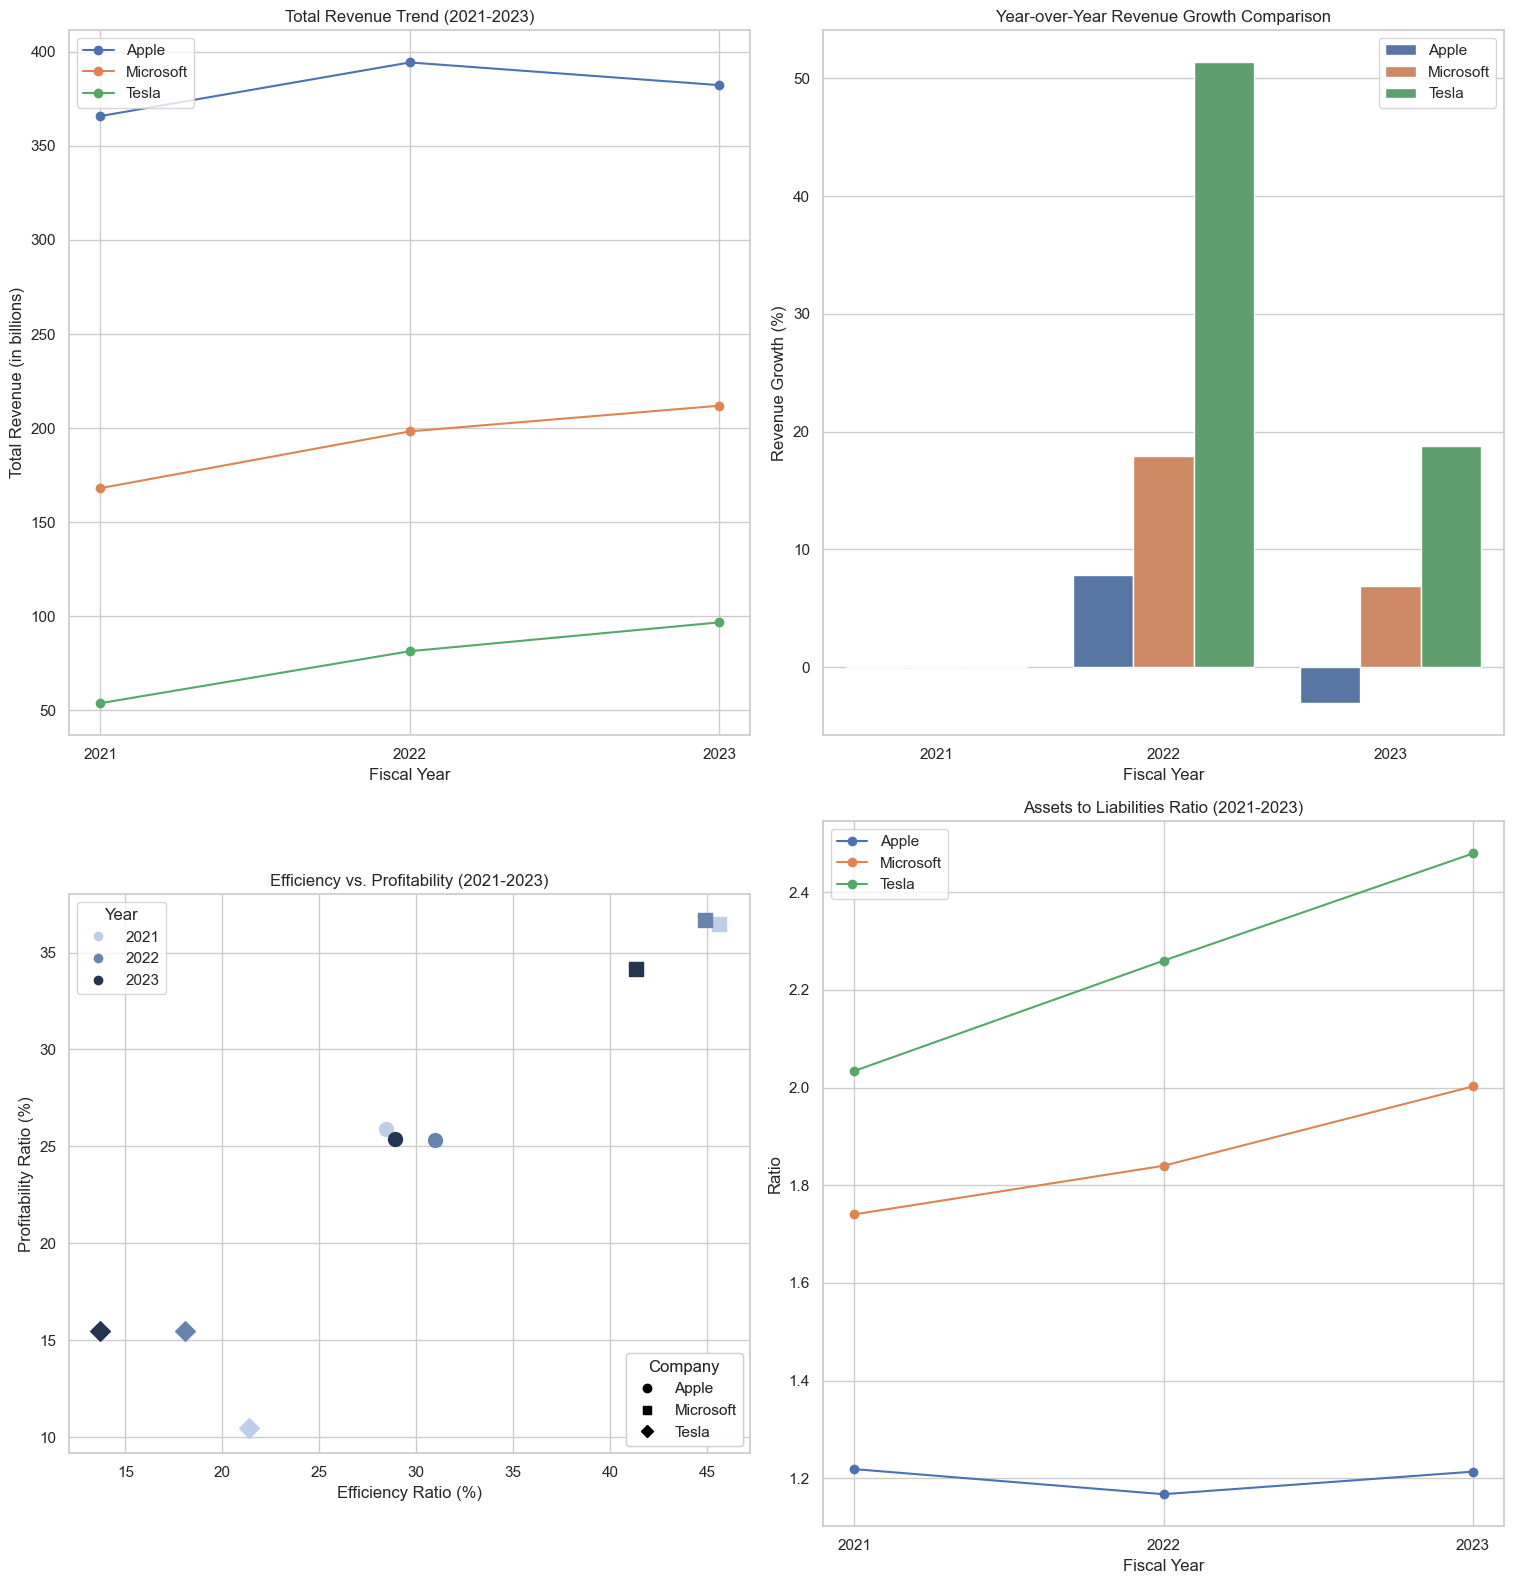

In [17]:
# Set the style
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 16))

# Adjust space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.2)

markers = {
    'Apple': 'o',  # Circle
    'Microsoft': 's',  # Square
    'Tesla': 'D',  # Diamond
}

# Companies and years for legend
companies = df['Company'].unique()
years = df['Fiscal Year'].unique()
palette = sns.cubehelix_palette(start=2.8, rot=0, dark=0.2, light=0.8, n_colors=len(years))

# Total Revenue Trend
for company in companies:
    subset = df[df['Company'] == company]
    axs[0, 0].plot(subset['Fiscal Year'], subset['Total Revenue'], marker='o', linestyle='-', label=company)
axs[0, 0].set_title('Total Revenue Trend (2021-2023)')
axs[0, 0].set_xlabel('Fiscal Year')
axs[0, 0].set_ylabel('Total Revenue (in billions)')
axs[0, 0].legend(loc='upper left')
axs[0, 0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Year-over-Year Revenue Growth Comparison
sns.barplot(x='Fiscal Year', y='Revenue Growth (%)', hue='Company', data=df, ax=axs[0, 1], dodge=True)
axs[0, 1].set_title('Year-over-Year Revenue Growth Comparison')
axs[0, 1].set_xlabel('Fiscal Year')
axs[0, 1].set_ylabel('Revenue Growth (%)')
axs[0, 1].legend(loc='upper right')

# Efficiency vs. Profitability Scatter Plot
for i, year in enumerate(sorted(years)):
    subset = df[df['Fiscal Year'] == year]
    for company in companies:
        company_data = subset[subset['Company'] == company]
        axs[1, 0].scatter(company_data['Efficiency Ratio'], company_data['Profitability Ratio'],
                          color=palette[i], marker=markers[company], s=100)
        
# Set the aspect of the plot to be equal. This means that the units will be the same in both axes.
axs[1, 0].set_aspect('equal', adjustable='box')

# legends for year color and company marker shape
year_legend = [plt.Line2D([0], [0], marker='o', color=palette[i], linestyle='', label=year)
               for i, year in enumerate(sorted(years))]
company_legend = [plt.Line2D([0], [0], marker=markers[company], color='black', linestyle='', label=company)
                  for company in companies]
legend1 = axs[1, 0].legend(handles=year_legend, loc='upper left', title='Year')
axs[1, 0].add_artist(legend1)
legend2 = axs[1, 0].legend(handles=company_legend, loc='lower right', title='Company', frameon=True)
axs[1, 0].add_artist(legend2)

axs[1, 0].set_title('Efficiency vs. Profitability (2021-2023)')
axs[1, 0].set_xlabel('Efficiency Ratio (%)')
axs[1, 0].set_ylabel('Profitability Ratio (%)')

# Assets to Liabilities Ratio for each year
for company in companies:
    subset = df[df['Company'] == company]
    axs[1, 1].plot(subset['Fiscal Year'], subset['Total Assets'] / subset['Total Liabilities'],
                    marker='o', linestyle='-', label=company)
axs[1, 1].set_title('Assets to Liabilities Ratio (2021-2023)')
axs[1, 1].set_xlabel('Fiscal Year')
axs[1, 1].set_ylabel('Ratio')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_xticks(years)
axs[1, 1].set_xticklabels(years)

# Show the combined plot
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [18]:
# Ensure the DataFrame is sorted
df.sort_values(by=['Company', 'Fiscal Year'], ascending=[True, True], inplace=True)

# Calculate the year-over-year percentage change for Total Revenue
df['Total Revenue YoY Change (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100

# Repeat for other metrics
df['Net Income YoY Change (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Total Assets YoY Change (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Total Liabilities YoY Change (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow from Operating Activities YoY Change (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

In [19]:
average_changes = df.groupby('Company')[['Total Revenue YoY Change (%)', 'Net Income YoY Change (%)', 'Total Assets YoY Change (%)', 'Total Liabilities YoY Change (%)', 'Cash Flow from Operating Activities YoY Change (%)']].mean()
average_changes

,Total Revenue YoY Change (%),Net Income YoY Change (%),Total Assets YoY Change (%),Total Liabilities YoY Change (%),Cash Flow from Operating Activities YoY Change (%)
Company,,,,,
Apple,2.368817,1.301039,0.225199,0.534197,3.951030
Microsoft,12.419609,9.099005,11.113131,3.575636,7.231736
Tesla,35.075437,71.065421,31.008030,18.654753,9.040761


## Saving

In [20]:
# Save each DataFrame to a CSV file
efficiency_profitability_trends.to_csv('efficiency_profitability_trends.csv', index=False)
growth_rate_analysis.to_csv('growth_rate_analysis.csv', index=False)
cfo_growth_analysis.to_csv('cfo_growth_analysis.csv', index=False)
average_changes.to_csv('average_changes.csv', index=False)
df.to_csv('detailed_financial_data.csv', index=False)

## Financial Analysis Summary

We've conducted a comprehensive analysis of key financial metrics for Apple, Microsoft, and Tesla over the fiscal years 2021 to 2023. The analysis focused on two main areas: financial ratios (Efficiency Ratio and Profitability Ratio) and year-over-year growth percentages across several metrics.

### Financial Ratios Analysis

#### Efficiency Ratio
- **Apple** Exhibited a minor fluctuation in its Efficiency Ratio, peaking in 2022 before slightly decreasing in 2023. Despite these changes, Apple maintains a relatively stable efficiency in converting revenue to cash.
- **Microsoft** Demonstrated a consistent decrease in its Efficiency Ratio from 45.63% in 2021 to 41.34% in 2023. This trend suggests a gradual decline in operational cash flow efficiency relative to its revenue.
- **Tesla** Experienced the most notable decrease in Efficiency Ratio, dropping from 21.37% in 2021 to 13.70% in 2023. This significant decline may point to challenges Tesla faces in maintaining operational cash flow efficiency amid rapid expansion.

#### Profitability Ratio
- **Apple** maintained a relatively stable Profitability Ratio, with a slight fluctuation indicating consistent profitability margins.
- **Microsoft**'s Profitability Ratio showed a small decline, reflecting a slight decrease in how much revenue is retained as net income.
- **Tesla** saw an improvement in its Profitability Ratio, rising from 10.48% in 2021 to 15.47% in 2023. This growth highlights Tesla's increasing efficiency in translating sales into net income.

### Year-over-Year Growth Analysis

#### Revenue and Net Income Growth
- **Apple** experienced a revenue decline in 2023 after a growth spurt in 2022, alongside a slight decrease in net income.
- **Microsoft** showed positive revenue and net income growth in 2022, with a modest increase in revenue but a slight decrease in net income in 2023.
- **Tesla** consistently demonstrated strong growth in both revenue and net income, with significant increases observed in 2023.

#### Assets, Liabilities, and CFO Growth
- **Apple** and **Microsoft** both managed to increase their assets over the years, with Microsoft showing a particularly strong growth in 2023. However, Apple saw a decrease in its liabilities in 2023, improving its financial standing.
- **Tesla** exhibited aggressive growth in assets and liabilities, reflecting its rapid expansion and investment in growth.
- The Cash Flow from Operating Activities (CFO) growth varied, with **Apple** and **Tesla** experiencing declines in 2023, suggesting a need for closer cash management and operational efficiency evaluation.

### Conclusions
This analysis reveals varied financial health and operational efficiency among the three technology giants over the studied fiscal years. <span style="color: #87CEEB;">**While Apple shows stability in its profitability,**</span> <span style="color: #90EE90;">**Microsoft demonstrates efficiency in operations,**</span> and <span style="color: #7B68EE;">**Tesla stands out for its aggressive growth and improving profitability.**</span> Each company, however, faces its own set of challenges, from managing operational efficiency to ensuring sustainable growth.

---